# Reservoir Computing and Mackey-Glass prediction

This notebook is an example of Mackey-Glass prediction using Reservoir Computing, towards an optical implementation.

## Initialization

In [1]:
import numpy as np
import time

from reservoir import Reservoir
import data1D

%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

## Data generation

In [10]:
input_data = data1D.mackey_glass(sequence_length=10000, n_sequence=4)

## Reservoir initialization

In [11]:
b = Reservoir(n_res=400, res_encoding=None, 
              input_scale=2, input_encoding=None, 
              random_projection='simulation', weights_type='gaussian', 
              activation_fun='tanh', 
              parallel_runs=4, 
              future_pred=True, pred_horizon=10, rec_pred_steps=5,
              train_method='ridge', train_param=1e1
              )

## Reservoir Training

In [12]:
b.fit(input_data);

Start of training...
Initialization finished. Elapsed time: 0.027892589569091797s
100%|██████████| 10000/10000 [00:04<00:00, 2395.50it/s]
Iterations finished. Elapsed time: 4.1790618896484375s
Training finished. Elapsed time: 0.7609031200408936s
Training score: 0.9919576766900088


## Reservoir Validation

In [6]:
input_data = data1D.mackey_glass(sequence_length=3000, n_sequence=2)

In [7]:
pred_output, valid_score = b.score(input_data);

Start of testing...
Initialization finished. Elapsed time: 0.0007283687591552734
100%|██████████| 3000/3000 [00:00<00:00, 3148.74it/s]
Iterations finished. Elapsed time: 0.9582333564758301
Testing finished. Elapsed time: 0.015790700912475586
Testing score: 0.9923765016999928


# Score for predictions far in the future

In [13]:
input_data = data1D.mackey_glass(sequence_length=10000, n_sequence=1)
b = Reservoir(n_res=400, res_encoding=None, 
              input_scale=2, input_encoding=None, 
              random_projection='simulation', weights_type='gaussian', 
              activation_fun='tanh', 
              parallel_runs=1, 
              future_pred=True, pred_horizon=2000, rec_pred_steps=5,
              train_method='ridge', train_param=1e1
              )
b.fit(input_data);

Start of training...
Initialization finished. Elapsed time: 0.7184903621673584s
100%|██████████| 10000/10000 [00:01<00:00, 6982.19it/s]
Iterations finished. Elapsed time: 1.4357264041900635s
Training finished. Elapsed time: 8.241801261901855s
Training score: 0.190886417530845


In [14]:
input_data = data1D.mackey_glass(sequence_length=10000, n_sequence=1)
pred_output, valid_score = b.score(input_data);

Start of testing...
Initialization finished. Elapsed time: 0.0006787776947021484
100%|██████████| 10000/10000 [00:01<00:00, 7062.92it/s]
Iterations finished. Elapsed time: 1.419147253036499
Testing finished. Elapsed time: 7.908353090286255
Testing score: 0.1629588382662871


Text(0, 0.5, 'Score')

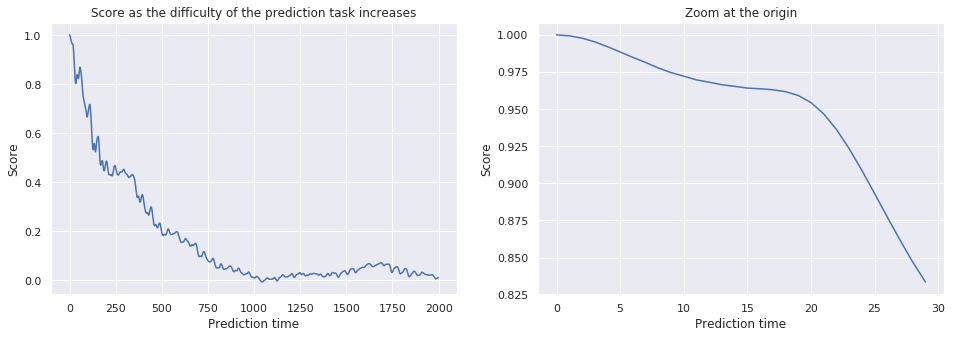

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
ax1.plot(valid_score)
ax1.set_title('Score as the difficulty of the prediction task increases')
ax1.set_xlabel('Prediction time')
ax1.set_ylabel('Score')

ax2.plot(valid_score[:30])
ax2.set_title('Zoom at the origin')
ax2.set_xlabel('Prediction time')
ax2.set_ylabel('Score')

# Time series length needed

In [103]:
n_length = 100
length_vec = np.ceil(np.logspace(2.1, 3.5, num=n_length))
score_vec = np.zeros((n_length, ))

for i_l in range(n_length):
    length = length_vec[i_l]
    print('Current training time series length: ' + str(length))
    input_data = data1D.mackey_glass(sequence_length=int(length), n_sequence=1)
    b = Reservoir(future_pred=True, verbose=False)
    b.fit(input_data)
    
    input_data = data1D.mackey_glass(sequence_length=10000, n_sequence=1)
    pred_output, valid_score = b.score(input_data)
    
    score_vec[i_l] = np.mean(valid_score)

Current training time series length: 126.0
100%|██████████| 10000/10000 [00:00<00:00, 26210.39it/s]
Current training time series length: 131.0
100%|██████████| 10000/10000 [00:00<00:00, 27257.17it/s]
Current training time series length: 135.0
100%|██████████| 10000/10000 [00:00<00:00, 26018.82it/s]
Current training time series length: 139.0
100%|██████████| 10000/10000 [00:00<00:00, 16061.94it/s]
Current training time series length: 144.0
100%|██████████| 10000/10000 [00:00<00:00, 23806.80it/s]
Current training time series length: 149.0
100%|██████████| 10000/10000 [00:00<00:00, 25632.02it/s]
Current training time series length: 154.0
100%|██████████| 10000/10000 [00:00<00:00, 26320.37it/s]
Current training time series length: 159.0
100%|██████████| 10000/10000 [00:00<00:00, 26273.70it/s]
Current training time series length: 164.0
100%|██████████| 10000/10000 [00:00<00:00, 25376.25it/s]
Current training time series length: 169.0
100%|██████████| 10000/10000 [00:00<00:00, 26267.33it/s]


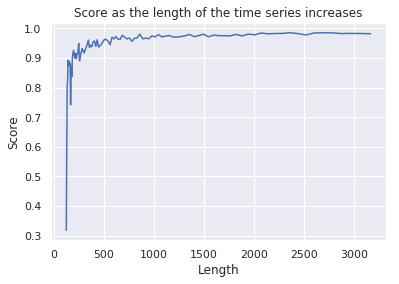

In [104]:
fig, ax = plt.subplots()
ax.plot(length_vec, score_vec)
ax.set_title('Score as the length of the time series increases')
ax.set_xlabel('Length')
ax.set_ylabel('Score');

# Effect of parallelization

In [129]:
n_par_max = 20
score_vec = np.zeros((n_par_max, ))
time_vec = np.zeros((n_par_max, ))
length = 4000

for n_par in range(1, n_par_max+1):
    print('Current parallelization number: ' + str(n_par))
    input_data = data1D.mackey_glass(sequence_length=int(length / n_par), n_sequence=n_par)
    b = Reservoir(future_pred=True, verbose=0, parallel_runs=n_par)
    b.fit(input_data)
    
    input_data = data1D.mackey_glass(sequence_length=int(length / n_par), n_sequence=n_par)
    pred_output, valid_score = b.score(input_data)
    
    score_vec[n_par-1] = np.mean(valid_score)
    time_vec[n_par-1] = b.iterate_timer

score_vec2 = np.zeros((n_par_max, ))
length = 20000
for n_par in range(1, n_par_max+1):
    print('Current parallelization number: ' + str(n_par))
    input_data = data1D.mackey_glass(sequence_length=int(length / n_par), n_sequence=n_par)
    b = Reservoir(future_pred=True, verbose=0, parallel_runs=n_par)
    b.fit(input_data)
    
    input_data = data1D.mackey_glass(sequence_length=int(length / n_par), n_sequence=n_par)
    pred_output, valid_score = b.score(input_data)
    
    score_vec2[n_par-1] = np.mean(valid_score)
    time_vec[n_par-1] = b.iterate_timer

Current parallelization number: 1
Current parallelization number: 2
Current parallelization number: 3
Current parallelization number: 4
Current parallelization number: 5
Current parallelization number: 6
Current parallelization number: 7
Current parallelization number: 8
Current parallelization number: 9
Current parallelization number: 10
Current parallelization number: 11
Current parallelization number: 12
Current parallelization number: 13
Current parallelization number: 14
Current parallelization number: 15
Current parallelization number: 16
Current parallelization number: 17
Current parallelization number: 18
Current parallelization number: 19
Current parallelization number: 20
Current parallelization number: 1
Current parallelization number: 2
Current parallelization number: 3
Current parallelization number: 4
Current parallelization number: 5
Current parallelization number: 6
Current parallelization number: 7
Current parallelization number: 8
Current parallelization number: 9
Cur

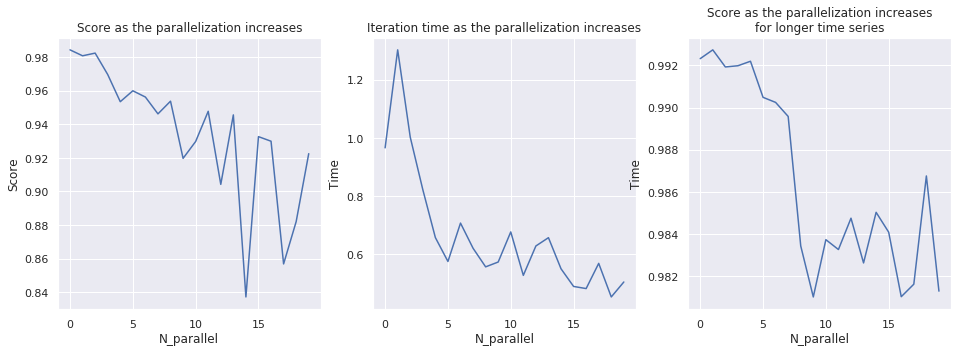

In [130]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,5))
ax1.plot(score_vec)
ax1.set_title('Score as the parallelization increases')
ax1.set_xlabel('N_parallel')
ax1.set_ylabel('Score');
ax2.plot(time_vec)
ax2.set_title('Iteration time as the parallelization increases')
ax2.set_xlabel('N_parallel')
ax2.set_ylabel('Time');
ax3.plot(score_vec2)
ax3.set_title('Score as the parallelization increases\nfor longer time series')
ax3.set_xlabel('N_parallel')
ax3.set_ylabel('Time');

# Score for larger reservoirs

In [140]:
n_tries = 10
n_res_vec = np.ceil(np.logspace(2, 4, num=n_tries))
score_vec = np.zeros((n_tries, ))
time_vec = np.zeros((n_tries, ))

for i in range(n_tries):
    n_res = n_res_vec[i]
    print('Current neuron number: ' + str(n_res))
    input_data = data1D.mackey_glass(sequence_length=10000, n_sequence=1)
    b = Reservoir(n_res=int(n_res), future_pred=True, verbose=0)
    b.fit(input_data)
    
    input_data = data1D.mackey_glass(sequence_length=10000, n_sequence=1)
    pred_output, valid_score = b.score(input_data)
    
    score_vec[i] = np.mean(valid_score)
    time_vec[i] = b.iterate_timer

Current neuron number: 100.0
Current neuron number: 167.0
Current neuron number: 279.0
Current neuron number: 465.0
Current neuron number: 775.0
Current neuron number: 1292.0
Current neuron number: 2155.0
Current neuron number: 3594.0
Current neuron number: 5995.0
Current neuron number: 10000.0


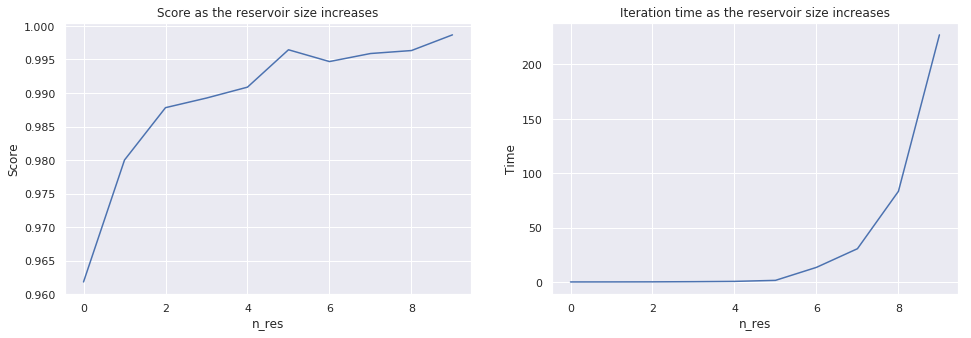

In [141]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
ax1.plot(score_vec)
ax1.set_title('Score as the reservoir size increases')
ax1.set_xlabel('n_res')
ax1.set_ylabel('Score');
ax2.plot(time_vec)
ax2.set_title('Iteration time as the reservoir size increases')
ax2.set_xlabel('n_res')
ax2.set_ylabel('Time');

# Recursive prediction test

In [60]:
pred_horizon = 10
rec_pred_steps = 20

input_data = data1D.mackey_glass(sequence_length=10000, n_sequence=1)
b = Reservoir(n_res=1000, input_scale=2, 
              future_pred=True, pred_horizon=pred_horizon, rec_pred_steps=rec_pred_steps, train_param=2e1)
b.fit(input_data)

init_length = 1000
input_data = data1D.mackey_glass(sequence_length=init_length+pred_horizon*rec_pred_steps)
pred_output = b.recursive_predict(input_data[:,:init_length,:])

Start of training...
Initialization finished. Elapsed time: 0.039997100830078125s
100%|██████████| 10000/10000 [00:05<00:00, 1771.53it/s]
Iterations finished. Elapsed time: 5.647035121917725s
Training finished. Elapsed time: 0.341782808303833s
Training score: 0.9911251542767702
Start of testing...
Initialization finished. Elapsed time:
0.0004355907440185547
100%|██████████| 1000/1000 [00:00<00:00, 2157.87it/s]
Iterations finished. Elapsed time:
0.4659860134124756
100%|██████████| 10/10 [00:00<00:00, 1159.80it/s]
Testing finished. Elapsed time:
0.2988152503967285


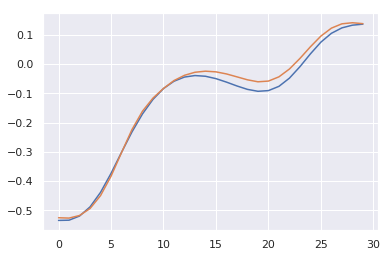

In [61]:
total_pred = pred_horizon*rec_pred_steps
plt.plot(np.squeeze(input_data[0,-total_pred-10:-total_pred+20,0]))
plt.plot(np.squeeze(pred_output[0,-total_pred-10:-total_pred+20,0]));

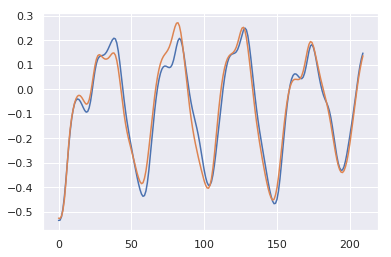

In [62]:
total_pred = pred_horizon*rec_pred_steps
plt.plot(np.squeeze(input_data[0,-total_pred-10:,0]))
plt.plot(np.squeeze(pred_output[0,-total_pred-10:,0]));

# Phase test

In [18]:
input_data = data1D.mackey_glass(sequence_length=10000, n_sequence=1)
b = Reservoir(n_res=400, res_encoding=None, 
              input_scale=2, input_encoding='phase', 
              random_projection='simulation', weights_type='complex gaussian', 
              activation_fun='phase', activation_param=np.pi, 
              parallel_runs=1, 
              future_pred=True, pred_horizon=10, rec_pred_steps=5,
              train_method='ridge', train_param=1e0, is_complex=True
              )
b.fit(input_data);

Start of training...
Initialization finished. Elapsed time: 0.03249049186706543s
100%|██████████| 10000/10000 [00:04<00:00, 2444.74it/s]
Iterations finished. Elapsed time: 4.094027519226074s
Training finished. Elapsed time: 0.42815089225769043s
Training score: 0.9944011019154194


In [19]:
input_data = data1D.mackey_glass(sequence_length=3000, n_sequence=1)

pred_output, valid_score = b.score(input_data);

Start of testing...
Initialization finished. Elapsed time: 0.0010313987731933594
100%|██████████| 3000/3000 [00:01<00:00, 2517.35it/s]
Iterations finished. Elapsed time: 1.1965875625610352
Testing finished. Elapsed time: 0.010316133499145508
Testing score: 0.9977064384254923


# Binary test

In [45]:
input_data = data1D.mackey_glass(sequence_length=10000, n_sequence=1)
b = Reservoir(n_res=1000, res_encoding=None, 
              input_scale=2, input_encoding='naive binary', input_enc_dim=1000, 
              random_projection='simulation', weights_type='complex gaussian', 
              activation_fun='binary', 
              parallel_runs=1, 
              future_pred=True, pred_horizon=10, rec_pred_steps=5,
              train_method='ridge', train_param=1e0, is_complex=True
              )
b.fit(input_data);

Start of training...
Initialization finished. Elapsed time: 0.34529924392700195s
100%|██████████| 10000/10000 [00:22<00:00, 449.29it/s]
Iterations finished. Elapsed time: 22.259191036224365s
Training finished. Elapsed time: 4.476653099060059s
Training score: 0.8724312620282516


In [46]:
input_data = data1D.mackey_glass(sequence_length=3000, n_sequence=1)

pred_output, valid_score = b.score(input_data);

Start of testing...
Initialization finished. Elapsed time: 0.031823158264160156
100%|██████████| 3000/3000 [00:06<00:00, 455.67it/s]
Iterations finished. Elapsed time: 6.585673570632935
Testing finished. Elapsed time: 0.04992961883544922
Testing score: 0.8031617135332935


# Recursive prediction score

In [41]:
pred_horizon = 10
rec_pred_steps = 10

input_data = data1D.mackey_glass(sequence_length=4000, n_sequence=1)
b = Reservoir(n_res=1000, input_scale=2,
              future_pred=True, pred_horizon=pred_horizon, rec_pred_steps=rec_pred_steps, train_param=2e1)
b.fit(input_data)

init_length = 1000
input_data = data1D.mackey_glass(sequence_length=init_length+pred_horizon*rec_pred_steps)
error_vec, pred_output = b.recursive_predict_score(input_data)

Start of training...
Initialization finished. Elapsed time: 0.040528297424316406s
100%|██████████| 4000/4000 [00:01<00:00, 2384.98it/s]
Iterations finished. Elapsed time: 1.6829626560211182s
Training finished. Elapsed time: 0.14974021911621094s
Training score: 0.9829172691254551
Start of testing...
Initialization finished. Elapsed time:
0.0004239082336425781
100%|██████████| 1000/1000 [00:00<00:00, 2246.70it/s]
Iterations finished. Elapsed time:
0.44803714752197266
100%|██████████| 1/1 [00:00<00:00, 88.73it/s]
Testing finished. Elapsed time:
0.12765145301818848


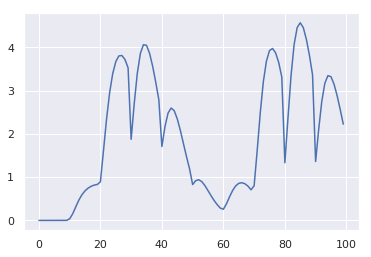

In [42]:
plt.plot(score_vec)